# Overlapping records in two datasets

In [1]:
import numpy as np
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)

# Read datasets to match

Read datasets A and B into Pandas data frames A and B, respectively.

In [3]:
df_a = pd.read_csv('datasetA.csv', dtype=str)
df_a

,first_name,last_name,street_number,address_1,address_2,town,zipcode,state,date_of_birth,age,phone_number,soc_sec_id
0,lachlan,carmody,19,cade place,b,hamilton,4556,qld,19960616,31.0,02 92812617,2231206
1,sarah,tippins,3,keverstone circuit,NaN,woodpark,5540,qld,19280526,13.0,04 11695119,4612010
2,jessica,cheshire,12,halfrey circuit,NaN,jesmond,5172,nsw,19210205,26.0,02 02242599,3144617
3,natalia,tiller,73,eagle circuit,NaN,camden,5114,nt,19351203,33.0,07 91923807,1245778
4,lily,blackwell,18,bindel street,cambooya,oak flats,6230,nsw,19791106,NaN,04 45361517,2195128
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,jessica,clarke,52,NaN,msf 60,chelmsford,2566,nsw,19601129,NaN,03 40798285,4849937
9996,alessandra,moody,514,withnell circuit,NaN,narrogin,6207,vic,19210819,NaN,03 44448442,3068581
9997,darcie,burford,4,longerenong street,cambridge park,ballarat,NaN,nsw,19970902,33.0,04 31228862,9011666
9998,steven,white,70,investigator street,NaN,parkdale,2640,nsw,19280106,34.0,04 90977051,1490648


In [4]:
df_b = pd.read_csv('datasetB.csv', dtype=str)
df_b

,first_name,last_name,street_number,address_1,address_2,town,zipcode,state,date_of_birth,age,phone_number,soc_sec_id
0,baysen,scudds,11,helemontstreet,NaN,picton,4055,vic,19340808,29.0,03 82765568,1070893
1,jsohua,greej,30,muecke place,rockview,willetton,6023,wa,19164909,NaN,02 30027583,5782396
2,alicia,treumekr,24,hambidge crescent,NaN,bligh park,4216,qld,19000819,21.0,08 11540291,7788784
3,anna,reid,13,creswellsstreet,oxonia,parksie,4005,vim,19807429,NaN,03 26039045,1646214
4,dato,natasha,96,de burgh street,NaN,bayswater,4670,vic,19301075,23.0,08 76809985,4308494
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ema,britten,4,mugga fay,NaN,north beach,2211,ws,19150617,42.0,02 42401723,9558954
9996,keegan,herbdrt,56,dunbar sxtreet,dutch care hostel,como,4065,qld,NaN,30.0,NaN,8854365
9997,makenzie,huxldey,6,frencham place,NaN,longrgeach,5271,wa,19810514,29.0,07 53146771,4011126
9998,sybella,irizsrry,5,mckinlay street,NaN,vermont,3141,qld,19890909,35.0,08 92355273,7620274


# Examples of matches

In [5]:
df_a.loc[[962, 2847, 7787, 6724]]

,first_name,last_name,street_number,address_1,address_2,town,zipcode,state,date_of_birth,age,phone_number,soc_sec_id
962,NaN,fleet,65,dartnell street,NaN,reynella,4215,nsw,19160720,23.0,02 46529999,1933859
2847,cameron,lademan,19,ebden street,NaN,williamstown,3165,nsw,19430515,29.0,08 39803141,8805927
7787,jamie,caruana,18,packham place,NaN,sunshine north,2096,nsw,19590202,23.0,08 71094666,5726002
6724,sophie,haupt,6,macrossan crescent,NaN,kyogle,2534,nsw,19071127,33.0,08 51432405,8085321


In [6]:
df_b.loc[[2704, 6268, 4843, 7373]]

,first_name,last_name,street_number,address_1,address_2,town,zipcode,state,date_of_birth,age,phone_number,soc_sec_id
2704,NaN,fleent,65,street datnell,NaN,reynella,4215,nsw,19160720,23.0,02 45629999,1933859
6268,camern,lademan,199,ebden street,NaN,bronte,3615,nsw,19430515,29.0,08 39803141,8805927
4843,jamie,caruana,18,packhamplace,NaN,sunshine north,2069,nzw,19590202,23.0,08 12512838,5726002
7373,sophie,haupt,6,macrossan yescent,NaN,kyogle,2534,nsw,NaN,33.0,08 51432405,4114985


# Exact matches

Merging the data frames by requiring one or more exact matches **does
not find all overlapping records**, since it does not take into account
differences between the values of the match columns in data frame A
and data frame B.

In [7]:
EXACT_COLS = ['last_name', 'date_of_birth', 'address_1']

In [8]:
df_a[EXACT_COLS].notnull().all(axis=1).sum()

8472

In [9]:
df_b[EXACT_COLS].notnull().all(axis=1).sum()

7824

Merge data frames A and B on specified columns for exact matching

In [10]:
exact_merge = df_a[df_a[EXACT_COLS].notnull().all(axis=1)]\
                  .reset_index(drop=False)\
                  .merge(df_b[df_b[EXACT_COLS].notnull().all(axis=1)].reset_index(drop=False),
                         how='inner', on=EXACT_COLS, suffixes=('_a', '_b'))\
                  .set_index(['index_a', 'index_b'] + EXACT_COLS, drop=True)
exact_merge = exact_merge[sorted(exact_merge.columns)]
exact_merge

,,,,,address_2_a,address_2_b,age_a,age_b,first_name_a,first_name_b,phone_number_a,phone_number_b,soc_sec_id_a,soc_sec_id_b,state_a,state_b,street_number_a,street_number_b,town_a,town_b,zipcode_a,zipcode_b
index_a,index_b,last_name,date_of_birth,address_1,,,,,,,,,,,,,,,,,,
4,7442,blackwell,19791106,bindel street,cambooya,cambooya,NaN,NaN,lily,liplt,04 45361517,04 45361517,2195128,2195128,nsw,nsw,18,1,oak flats,oak flats,6230,6230
11,1897,hyland,19770727,badimara street,NaN,lst hse on left,32.0,8.0,talissa,talsxa,07 50826244,07 50826244,8476381,8476381,qld,qld,1,1,carnegie,carnegie,5163,5163
16,2709,webb,19431014,chevalley loop,NaN,NaN,11.0,14.0,adam,ada,07 20680550,07 20680550,2826430,2826430,vic,vic,10,10,mont albert,mont albert,NaN,NaN
32,9344,badman,19960914,jarrahdale street,NaN,NaN,23.0,23.0,shannon,shannon,02 29205913,02 29205193,6953470,6953470,qld,qld,26,26,bonnells bay,bonnell bay,2257,2257
36,5272,wooley,19530721,trussell place,knackery rhs,knackery rhs,26.0,29.0,dante,dante,NaN,NaN,9656996,9656996,qld,qld,3,3,underdale,undedae,4858,4858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,4026,matthews,19150613,ruthven street,caravn park,caravn park,21.0,21.0,jacobie,jacobue,08 77920512,08 77920512,3246160,3246160,qld,qkd,319,318,ryde,ryd,2567,2567
9962,2052,whale,19160324,deamer crescent,NaN,NaN,NaN,NaN,alana,alnam,07 99388950,07 99288950,1227704,1227604,vic,vic,96,96,yamba,yamba,4350,4350
9964,1900,manson,19330804,muresk street,NaN,NaN,33.0,33.0,noah,noah,02 65493761,02 65493761,9410525,9410525,vic,vci,6,8,elanora heights,elanoraheights,3555,3555


Print number of matches (incomplete set and possibly includes incorrect matches)

In [11]:
print('Exact merge on {0:s} gives {1:d} overlapping records'.format(str(EXACT_COLS), len(exact_merge)))

Exact merge on ['last_name', 'date_of_birth', 'address_1'] gives 905 overlapping records


In [12]:
'''Start my code'''

'Start my code'

In [13]:
import pandas as pd
from datasketch import MinHash, MinHashLSH

def preprocess_dataframe(df):
    """ Preprocess a pandas DataFrame for record matching.
    Applies lowercase conversion, whitespace removal and missing value handling to object columns.
    Also includes specific normalization for 'date_of_birth' and 'phone_number' columns if present."""
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.lower() # Convert string values in the column to lowercase for consistency.
            df[col] = df[col].str.strip() # Remove leading and trailing whitespace from string values in the column.
            df[col] = df[col].fillna('') # Replace any missing (NaN) values in the column with an empty string.

    def convert_date(date_str):
        """ Date normalization by attempting to convert a string to a datetime object with a specific format.
        Returns an empty string if the conversion fails. """
        try:
            return pd.to_datetime(date_str, format='%Y%m%d') # Try to convert the date string using the format YYYYMMDD.
        except ValueError:
            return '' # If the date string does not match the expected format, return an empty string.

    if 'date_of_birth' in df.columns:
        df['date_of_birth'] = df['date_of_birth'].apply(convert_date)

    def normalize_phone(phone_str):
        """ Phone number normalization by removing any non-digit characters from a string.
        Returns an empty string if a ValueError occurs. """
        try:
            return ''.join(filter(str.isdigit, phone_str)) # Keep only the digit characters from the phone number string and join them.
        except ValueError:
            return '' # If a ValueError occurs during processing, return an empty string.

    if 'phone_number' in df.columns:
        df['phone_number'] = df['phone_number'].apply(normalize_phone)
    return df 

df_a_processed = preprocess_dataframe(df_a.copy()) 
df_b_processed = preprocess_dataframe(df_b.copy()) 

In [14]:
def missing_values(df):
    """ Determine the percentage of non-missing values for each column in the DataFrame.
    Assumes a total number of 10000 rows."""
    total_num = 10000 
    for col in df.columns:
        non_missing_num = df[col].count() # Count the number of non-missing values in the current column.
        non_missing_percentage = (non_missing_num / total_num) * 100 # Calculate the percentage of non-missing values.
        print(f" '{col}' "f"{non_missing_percentage:.2f}") 

missing_values(df_a) 
missing_values(df_b) 

def feature_extraction(row):
    """ Extracts a predefined set of features from a row of a pandas DataFrame and store in feature dictionary.
    Only include rows with a non_missing_percentage > 95."""
    features = {} 
    features['first_name'] = row['first_name'] 
    features['last_name'] = row['last_name'] 
    features['street_number'] = row['street_number'] 
    features['address_1'] = row['address_1'] 
    features['town'] = row['town'] 
    features['zipcode'] = row['zipcode'] 
    features['soc_sec_id'] = row['soc_sec_id'] 
    return features 

feature_list_a = df_a_processed.apply(feature_extraction, axis=1).tolist() 
feature_list_b = df_b_processed.apply(feature_extraction, axis=1).tolist() 
features = ['first_name', 'last_name', 'street_number', 'address_1', 'town', 'zipcode', 'soc_sec_id'] 

 'first_name' 98.09
 'last_name' 98.03
 'street_number' 97.77
 'address_1' 96.32
 'address_2' 39.62
 'town' 98.99
 'zipcode' 99.16
 'state' 89.70
 'date_of_birth' 89.74
 'age' 79.60
 'phone_number' 95.03
 'soc_sec_id' 100.00
 'first_name' 97.15
 'last_name' 96.68
 'street_number' 96.68
 'address_1' 94.42
 'address_2' 33.01
 'town' 98.57
 'zipcode' 98.87
 'state' 87.68
 'date_of_birth' 85.77
 'age' 76.93
 'phone_number' 93.84
 'soc_sec_id' 100.00


In [15]:
def search_pairs(features, feature_list_a, feature_list_b, df_a_processed, df_b_processed, lsh_threshold, lsh_num_perm, target):
    """ Uses MinHashing to create signatures for records in two lists of features and
    Locality Sensitive Hashing (LSH) to generate candidate pairs of potentially similar records. """
    lsh = MinHashLSH(threshold=lsh_threshold, num_perm=lsh_num_perm) # Initialize the LSH index 
    signatures_a = {} 
    for i, feature_a in enumerate(feature_list_a):
        m = MinHash(num_perm=lsh_num_perm) # Create a new MinHash object for the current record.
        #update MinHash with all relevant features.
        for feature in features:
            value = str(feature_a[feature]).encode('utf8') # Get the value of the current feature, convert it to a string and encode it to UTF-8.
            m.update(value) # Update the MinHash signature with the hashed value of the feature.
        lsh.insert(i, m) # Insert the MinHash signature into the LSH index, using the index 'i' as the key.
        signatures_a[i] = m 

    candidate_pairs = [] 
    signatures_b = {} 
    for j, feature_b in enumerate(feature_list_b):
        m = MinHash(num_perm=lsh_num_perm) # Create a new MinHash object for the current record.
        # Update MinHash with all relevant features.
        for feature in features:
            value = str(feature_b[feature]).encode('utf8') # Get the value of the current feature, convert it to a string, encode it to UTF-8.
            m.update(value) # Update the MinHash signature with the hashed value of the feature.
        signatures_b[j] = m

        # Determine candidate pairs
        results = lsh.query(m) # Query the LSH index with the MinHash signature of the current record from feature_list_b to find potential matches.
        for result in results:
            candidate_pairs.append((result, j)) # For each potential match found, add the pair of indices to the candidate_pairs list.

    def compare_cand_signatures(sign1, sign2, target):
        """ Compares two MinHash signatures to determine if their similarity meets a given target.
        The similarity is calculated as the fraction of positions where the signature elements agree."""
        count_sim = 0 
        target_count = len(sign1) * target # Calculate the minimum number of agreeing elements required to meet the target similarity.
        for i in range(len(sign1)):
            if sign1[i] == sign2[i]:
                count_sim += 1 
            if count_sim >= target_count: 
                return True # Return True, indicating that the signatures are considered similar enough.
        return False # If the loop completes without reaching the target count, return False.

    def compare_cand_original(cand1, cand2, target):
        """ Calculates the Jaccard similarity between two original data records represented as lists.
        The Jaccard similarity is the size of the intersection divided by the size of the union of the sets of elements."""
        cand1_set = set(map(str, cand1)) # Convert the candidate's elements to strings and create a set.
        cand2_set = set(map(str, cand2))  
        intersection = len(cand1_set & cand2_set) # Calculate the number of common elements between the two sets.
        union = len(cand1_set | cand2_set) # Calculate the total number of unique elements in both sets.
        similarity = intersection / union # Calculate the Jaccard similarity.
        return similarity >= target # Return True if the calculated Jaccard similarity is greater than or equal to the specified target.

    similar_signatures = 0 
    similar_pairs = 0 
    for a, b in candidate_pairs: # Iterate through each candidate pair.
        signature_a = signatures_a[a] 
        signature_b = signatures_b[b] 
        # Compare the MinHash signatures of the candidate pair using the defined target similarity.
        if compare_cand_signatures(signature_a.hashvalues, signature_b.hashvalues, target): 
            similar_signatures += 1 

            data_a = df_a_processed.loc[a] 
            data_b = df_b_processed.loc[b] 
            # If the signatures were similar, compare the original data of the candidate pair using Jaccard similarity and the defined target.
            if compare_cand_original(data_a.values, data_b.values, target): 
                similar_pairs += 1 

    return len(candidate_pairs), similar_signatures, similar_pairs 

In [16]:
def jaccard_similarity(cand1, cand2):
    """ Calculate the Jaccard similarity between two input lists.
    The Jaccard similarity is defined as the size of the intersection divided by the size of the union of the elements."""
    cand1_set = set(map(str, cand1)) # Convert the elements of the input to strings and create a set.
    cand2_set = set(map(str, cand2)) 
    intersection = len(cand1_set & cand2_set) # Calculate the number of common elements between the two sets.
    union = len(cand1_set | cand2_set) # Calculate the total number of unique elements in both sets.
    if union == 0:
        return 0 # If both sets are empty, the Jaccard similarity is defined as 0.
    similarity = intersection / union # Calculate the Jaccard similarity.
    return similarity 

# Lists of indices in that are known to be matches.
match_a = [962, 2847, 7787, 6724] 
match_b = [2704, 6268, 4843, 7373] 

# Calculate Jaccard similarities for known matches
jaccard_sim = [] 
for indx in range(len(match_a)): 
    similarity_score = jaccard_similarity(df_a.loc[match_a[indx]], df_b.loc[match_b[indx]]) 
    jaccard_sim.append(similarity_score) 

print('Jaccard similarities:', jaccard_sim) 

Jaccard similarities: [0.5714285714285714, 0.5, 0.5, 0.6428571428571429]


In [17]:
# Define lists of different parameter values to experiment with keeping in mind the Jaccard similarities for known matches.
lsh_thresholds = [0.4, 0.5, 0.6] 
lsh_num_perms = [64, 128, 256] 
targets = [0.3, 0.4, 0.5] 

results = [] 
# Call the search_pairs function with the current combination of parameters.
for lsh_threshold in lsh_thresholds:
    for lsh_num_perm in lsh_num_perms:
        for target in targets:
            candidate_pairs, similar_signatures, similar_pairs = search_pairs(features, feature_list_a, feature_list_b, df_a_processed, df_b_processed, lsh_threshold, lsh_num_perm, target)
            results.append({'lsh_threshold': lsh_threshold,'lsh_num_perm': lsh_num_perm,'target': target,'candidate_pairs': candidate_pairs,
                            'similar_signatures': similar_signatures,'similar_pairs': similar_pairs})
results_df = pd.DataFrame(results)
print(results_df) 

    lsh_threshold  lsh_num_perm  target  candidate_pairs  similar_signatures  similar_pairs
0             0.4            64     0.3             4435                3706           3696
1             0.4            64     0.4             4435                3584           3583
2             0.4            64     0.5             4435                3176           3154
3             0.4           128     0.3             5567                4298           4293
4             0.4           128     0.4             5567                4035           4035
5             0.4           128     0.5             5567                3506           3479
6             0.4           256     0.3             4460                4075           4073
7             0.4           256     0.4             4460                3894           3893
8             0.4           256     0.5             4460                3542           3516
9             0.5            64     0.3             4069                3564    

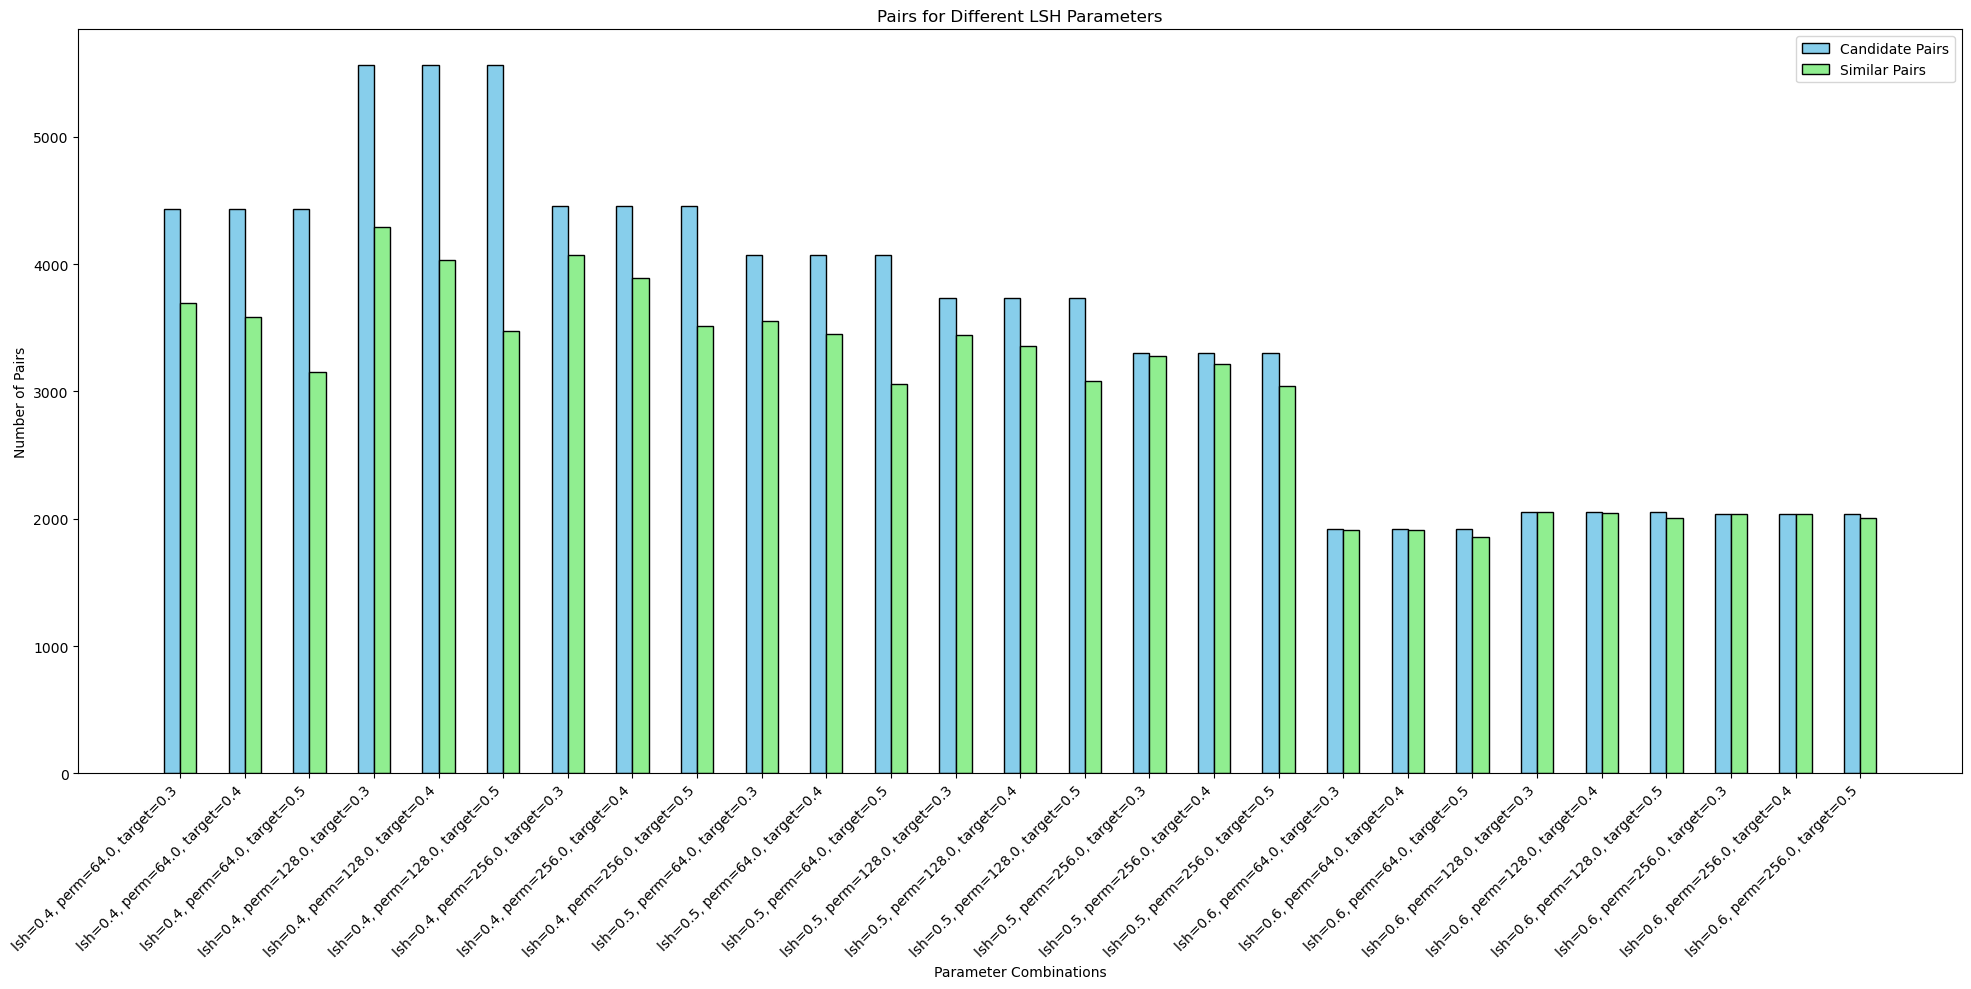

In [18]:
# Create a new column 'parameter_combination' by combining the values of 'lsh_threshold', 'lsh_num_perm', and 'target' for each row.
results_df['parameter_combination'] = results_df.apply(lambda row: f"lsh={row['lsh_threshold']}, perm={row['lsh_num_perm']}, target={row['target']}",axis=1)

# Visualise results
plt.figure(figsize=(20, 10))
bar_positions = np.arange(len(results_df['parameter_combination'].unique()))
bar_width = 0.25

plt.bar(bar_positions - bar_width/2, results_df['candidate_pairs'], bar_width, label='Candidate Pairs', color='skyblue', edgecolor='black')
plt.bar(bar_positions + bar_width/2, results_df['similar_pairs'], bar_width, label='Similar Pairs', color='lightgreen', edgecolor='black')

plt.xlabel('Parameter Combinations')
plt.ylabel('Number of Pairs')
plt.title('Pairs for Different LSH Parameters')
plt.xticks(bar_positions, results_df['parameter_combination'].unique(), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

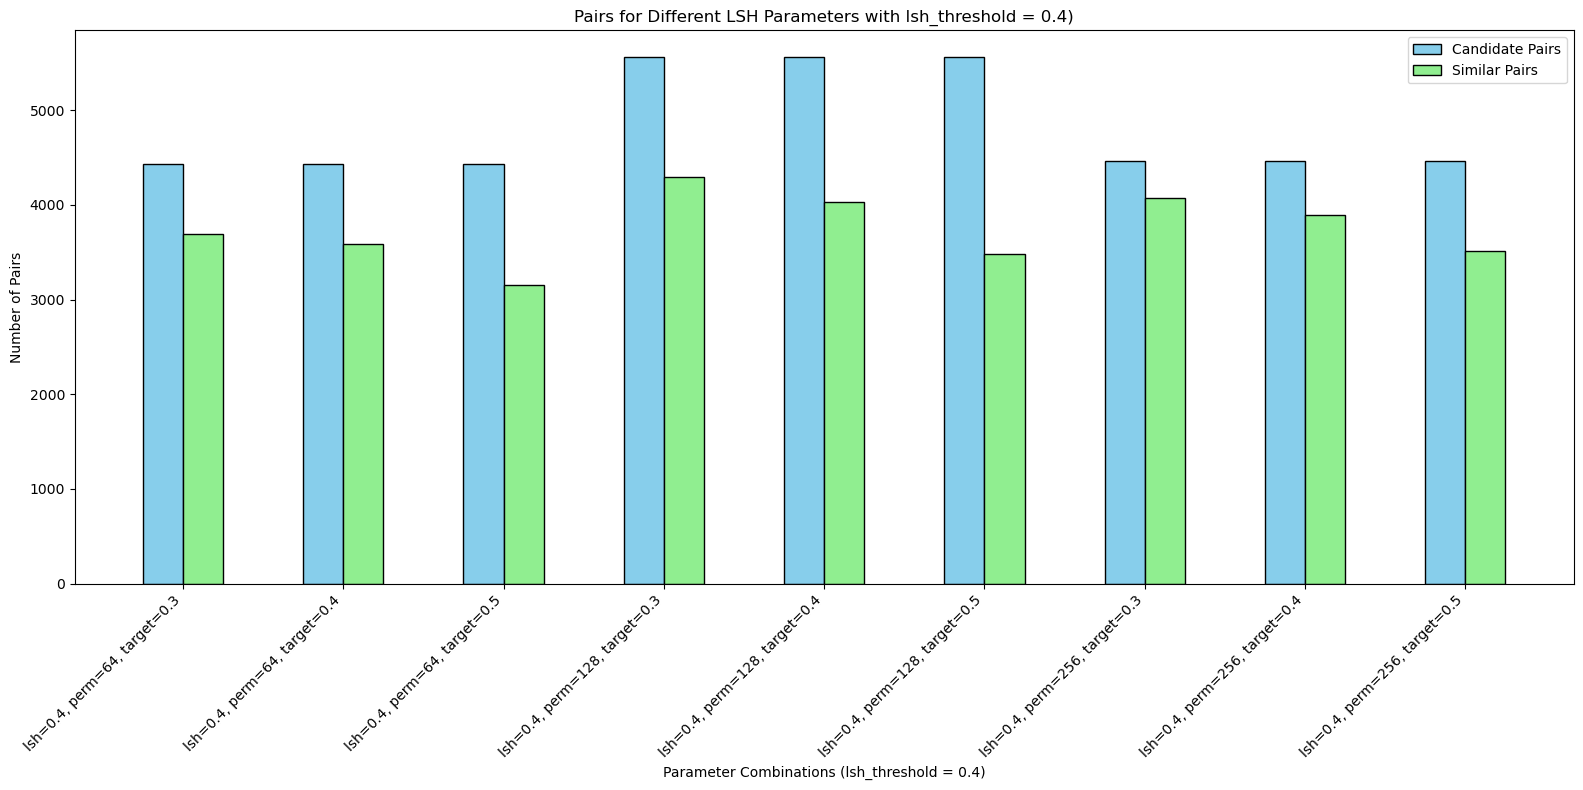

In [19]:
""" The results show that an LSH threshold of 0.6 results in around 2000 candidate pairs. This threshold seems to prioritize precision, but at the 
expense of recall. Given that the data contains noise due to typos and missing values, a threshold of 0.6 rejects too many potential matches that could 
still be valid. Therefore, I believe that an LSH threshold of 0.6 is too high for this data and leads to missed true matches. Similarly, a threshold of 
0.5 still appears to be too restrictive, resulting in fewer candidate pairs and a risk of reduced recall. While such a setting may improve precision, 
the potential loss of true matches does not outweigh the benefit. In contrast, a lower threshold like 0.4 generates a broader selection of candidate 
pairs and provides a better balance between recall and precision in the context of noisy and inconsistent data. """

# Filter out results where lsh_threshold is 0.5 or 0.6.
filtered_results_df = results_df[(results_df['lsh_threshold'] != 0.5) & (results_df['lsh_threshold'] != 0.6)].copy()

# Create a new column 'parameter_combination' for the filtered DataFrame.
filtered_results_df['parameter_combination'] = filtered_results_df.apply(lambda row: f"lsh={row['lsh_threshold']}, perm={row['lsh_num_perm']}, target={row['target']}",axis=1)

# Visualise the filtered results.
plt.figure(figsize=(16, 8))  
bar_positions = np.arange(len(filtered_results_df['parameter_combination'].unique()))
bar_width = 0.25

plt.bar(bar_positions - bar_width / 2, filtered_results_df['candidate_pairs'], bar_width, label='Candidate Pairs', color='skyblue', edgecolor='black')
plt.bar(bar_positions + bar_width / 2, filtered_results_df['similar_pairs'], bar_width, label='Similar Pairs', color='lightgreen', edgecolor='black')

plt.xlabel('Parameter Combinations (lsh_threshold = 0.4)')
plt.ylabel('Number of Pairs')
plt.title('Pairs for Different LSH Parameters with lsh_threshold = 0.4)')
plt.xticks(bar_positions, filtered_results_df['parameter_combination'].unique(), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

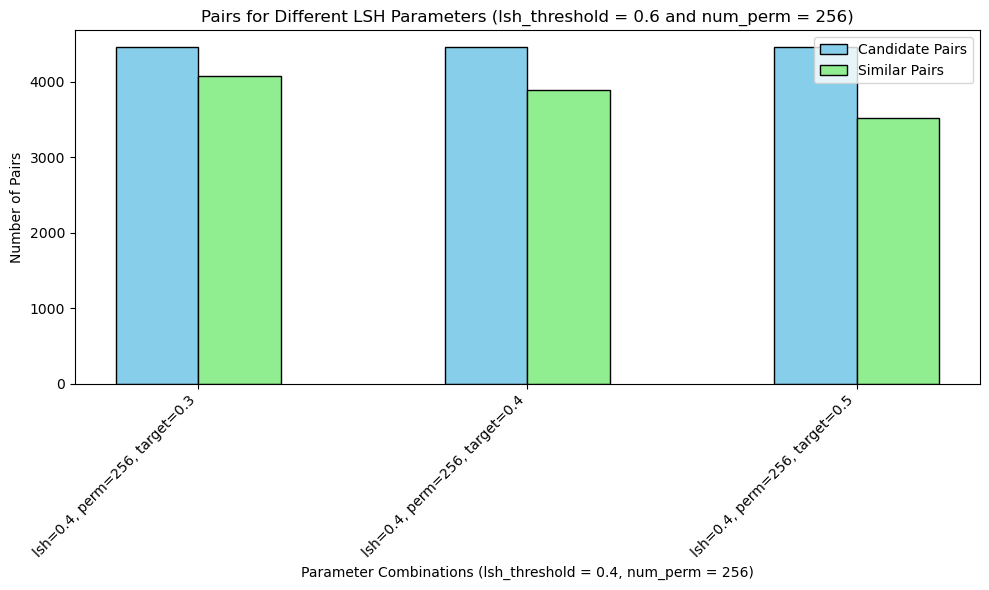

In [20]:
""" While num_perm = 128 generates the largest number of candidate pairs, it also leads to the largest gap between the number of candidate pairs and 
actual matches. This suggests that many of the generated pairs are false positives, making this setting less efficient. The high number of permutations 
increases computational cost without a proportional gain in true matches, so it is not an optimal choice for this dataset. Furthermore, while 
num_perm = 64 and num_perm = 256 result in a similar number of candidate pairs, num_perm = 256 leads to a noticeably higher number of actual matches. 
This suggests that increasing the number of permutations improves the accuracy, allowing better separation between true and false matches. However, 
this comes at the cost of increased computational time. Although this comes with higher computational cost, in this case I choose to prioritize 
maximum match quality. Therefore, I consider num_perm = 256 to be the most suitable setting for this task. """

# Filter results to keep only lsh_threshold = 0.4 and lsh_num_perm = 256.
filtered_results_df = results_df[
    (results_df['lsh_threshold'] == 0.4) & (results_df['lsh_num_perm'] == 256)].copy()

# Create a new column 'parameter_combination' for the filtered DataFrame.
filtered_results_df['parameter_combination'] = filtered_results_df.apply(lambda row: f"lsh={row['lsh_threshold']}, perm={row['lsh_num_perm']}, target={row['target']}",axis=1)

# Visualise the filtered results.
plt.figure(figsize=(10, 6))  
bar_positions = np.arange(len(filtered_results_df['parameter_combination'].unique()))
bar_width = 0.25

plt.bar(bar_positions - bar_width / 2, filtered_results_df['candidate_pairs'], bar_width, label='Candidate Pairs', color='skyblue', edgecolor='black')
plt.bar(bar_positions + bar_width / 2, filtered_results_df['similar_pairs'], bar_width, label='Similar Pairs', color='lightgreen', edgecolor='black')

plt.xlabel('Parameter Combinations (lsh_threshold = 0.4, num_perm = 256)')
plt.ylabel('Number of Pairs')
plt.title('Pairs for Different LSH Parameters (lsh_threshold = 0.6 and num_perm = 256)')
plt.xticks(bar_positions, filtered_results_df['parameter_combination'].unique(), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
"""As expected, increasing this target threshold results in a decrease in the number of identified matches. A higher threshold imposes stricter 
similarity requirements, which may improve precision but risks excluding true matches that fall just below the cutoff. This again reflects the 
trade-off between precision and recall. Given the goal of maximizing the identification of true matches in the presence of noisy and inconsistent data, 
I chose for a target of 0.4 to balance between maintaining recall while ensuring reasonable precision. """

'As expected, increasing this target threshold results in a slight decrease in the number of identified matches. A higher threshold imposes stricter \nsimilarity requirements, which may improve precision but risks excluding valid matches that fall just below the cutoff. This again reflects the \ntrade-off between precision and recall. Given the goal of maximizing the identification of true matches in the presence of noisy and inconsistent data, \nI chose for a target of 0.4 to balance between maintaining recall while ensuring reasonable precision. '

In [23]:
# Final result.
lsh_threshold = 0.4
lsh_num_perm = 256 
target = 0.4
candidate_pairs, similar_signatures, similar_pairs = search_pairs(features, feature_list_a, feature_list_b, df_a_processed, df_b_processed, lsh_threshold, lsh_num_perm, target)

print('Number of record matches:', similar_pairs)

Number of record matches: 3893
